# Disclaimer!

Everything in this notebook has been used to supplement the write-up. Not many details were used in this notebook. The notebook only served the purpose of fundamentally understanding the data and provding a brief EDA to express my ideas on the write-up.

In [1]:
# Imports necessary packages
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pl.read_excel("data/nationaldatabaseofchildcareprices.xlsx") # Reads in data

In [4]:
df.describe() # Quick Summary stats

statistic,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,MUNR_20to64,FLFPR_20to64,FLFPR_20to64_Under6,FLFPR_20to64_6to17,FLFPR_20to64_Under6_6to17,MLFPR_20to64,PR_F,PR_P,MHI,ME,FME,MME,MHI_2018,ME_2018,FME_2018,MME_2018,TotalPop,OneRace,OneRace_W,OneRace_B,OneRace_I,OneRace_A,OneRace_H,OneRace_Other,TwoRaces,Hispanic,…,i_75C54toSA,i_75CSA,i_75FCCBto5,i_75FCC6to11,i_75FCC12to17,i_75FCC18to23,i_75FCC24to29,i_75FCC30to35,i_75FCC36to41,i_75FCC42to47,i_75FCC48to53,i_75FCC54toSA,i_75FCCSA,MCInfant,MCInfant_flag,MCToddler,MCToddler_flag,MCPreschool,MCPreschool_flag,_75CInfant,_75CInfant_flag,_75CToddler,_75CToddler_flag,_75CPreschool,_75CPreschool_flag,MFCCInfant,MFCCInfant_flag,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""34567""","""34567""","""34567""",34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,34567.0,…,23575.0,23575.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23593.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0,23383.0
"""null_count""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,10992.0,10992.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,10974.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0,11184.0
"""mean""",null,null,null,30388.132786,2012.999711,7.465902,7.02902,7.860291,6.900073,6.482007,7.275457,70.086125,68.821409,78.824106,66.940759,78.637814,11.739125,16.038131,46432.001931,27075.054081,21625.047495,33134.23257,50446.777363,29404.295539,23475.16971,35997.433918,99142.224752,97.922863,83.636247,8.971213,1.895634,1.216209,0.082101,2.117914,2.077146,8.401054,…,561.301972,666.498155,596.021811,597.732455,590.889877,574.638755,562.236582,562.236582,566.513193,566.513193,566.513193,566.513193,663.164607,146.05177,1.899801,130.482768,1.315263,122.232852,1.367609,165.926607,1.926461,149.213983,1.307634,140.386184,1.370661,113.421657,1.750118,106.759749,1.153359,104.18951,1.287859,128.909289,1.792841,120.784283,1.188,117.897482,1.294316
"""std""",null,null,null,15161.015383,3.162232,3.538619,3.56342,4.037657,3.446199,3.477956,3.990758,7.696499,11.758088,8.529813,13.285061,10.802983,5.681003,6.511816,12457.050093,5483.48493,4716.600817,7240.296013,13279.833788,5715.192737,4903.836942,7643.855532,317778.622152,1.952523,16.683515,14.51026,7.517786,2.633768,0.593602,3.779858,1.95252,13.284933,…,564.529253,1155.682656,786.101669,797.773319,755.200166,653.899222,559.793463,559.793463,589.392174,589.392174,589.392174,589.392174,1101.122681,53.698566,0.831546,43.77537,0.728806,38.538323,0.774638,62.889701,0.837951,52.236542,0.721561,46.337349,0.774716,32.819372,0.809895,29.982431,0.532176,28.961701,0.696762,38.54301,0.81808,35.334666,0.58367,34.111188,0.708542
"""min""","""Alabama""","""AK""","""Abbeville County""",1001.0,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,33.6,0.0,0.0,0.0,8.2,0.0,0.0,18528.56,4417.0,4290.0,3784.0,19841.92,4947.04,5019.3,4238.08,41.0,59.5,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
print("\nMissing values in each column:")
missing_values = df.select([pl.col(c).is_null().sum().alias(c) for c in df.columns])
missing_values.to_dicts() # finds missing data counts


Missing values in each column:


[{'State_Name': 0,
  'State_Abbreviation': 0,
  'County_Name': 0,
  'County_FIPS_Code': 0,
  'StudyYear': 0,
  'UNR_16': 0,
  'FUNR_16': 0,
  'MUNR_16': 0,
  'UNR_20to64': 0,
  'FUNR_20to64': 0,
  'MUNR_20to64': 0,
  'FLFPR_20to64': 0,
  'FLFPR_20to64_Under6': 0,
  'FLFPR_20to64_6to17': 0,
  'FLFPR_20to64_Under6_6to17': 0,
  'MLFPR_20to64': 0,
  'PR_F': 0,
  'PR_P': 0,
  'MHI': 0,
  'ME': 0,
  'FME': 0,
  'MME': 0,
  'MHI_2018': 0,
  'ME_2018': 0,
  'FME_2018': 0,
  'MME_2018': 0,
  'TotalPop': 0,
  'OneRace': 0,
  'OneRace_W': 0,
  'OneRace_B': 0,
  'OneRace_I': 0,
  'OneRace_A': 0,
  'OneRace_H': 0,
  'OneRace_Other': 0,
  'TwoRaces': 0,
  'Hispanic': 0,
  'Households': 0,
  'H_Under6_BothWork': 0,
  'H_Under6_FWork': 0,
  'H_Under6_MWork': 0,
  'H_Under6_SingleM': 2,
  'H_6to17_BothWork': 0,
  'H_6to17_Fwork': 0,
  'H_6to17_Mwork': 0,
  'H_6to17_SingleM': 2,
  'EMP_M': 0,
  'MEMP_M': 0,
  'FEMP_M': 0,
  'EMP_Service': 0,
  'MEMP_Service': 0,
  'FEMP_Service': 0,
  'EMP_Sales': 0,
  

## 1. Explore how childcare costs have changed over time across different states and counties

In [6]:
# Aggregate childcare costs by year, state, and county
df_childcare_costs = df.group_by(['StudyYear', 'State_Name', 'County_Name']).agg([
    pl.col('MCInfant').mean().alias('Average_MCInfant'),
    pl.col('MCToddler').mean().alias('Average_MCToddler'),
    pl.col('MCPreschool').mean().alias('Average_MCPreschool')
]).sort(by=["StudyYear"])

df_childcare_costs

StudyYear,State_Name,County_Name,Average_MCInfant,Average_MCToddler,Average_MCPreschool
i64,str,str,f64,f64,f64
2008,"""Texas""","""Wilbarger County""",null,null,null
2008,"""New York""","""Niagara County""",null,null,null
2008,"""Minnesota""","""Pennington County""",135.0,125.0,105.0
2008,"""Delaware""","""Sussex County""",125.65,113.4,100.11
2008,"""South Dakota""","""Tripp County""",null,null,null
…,…,…,…,…,…
2018,"""North Carolina""","""Jackson County""",165.0,159.23,78.46
2018,"""Virginia""","""Accomack County""",165.0,115.0,115.0
2018,"""Alabama""","""Marengo County""",104.83,104.83,101.5


## 2. Analyze Trends on Income, Unemployment, Male/Female Labor force

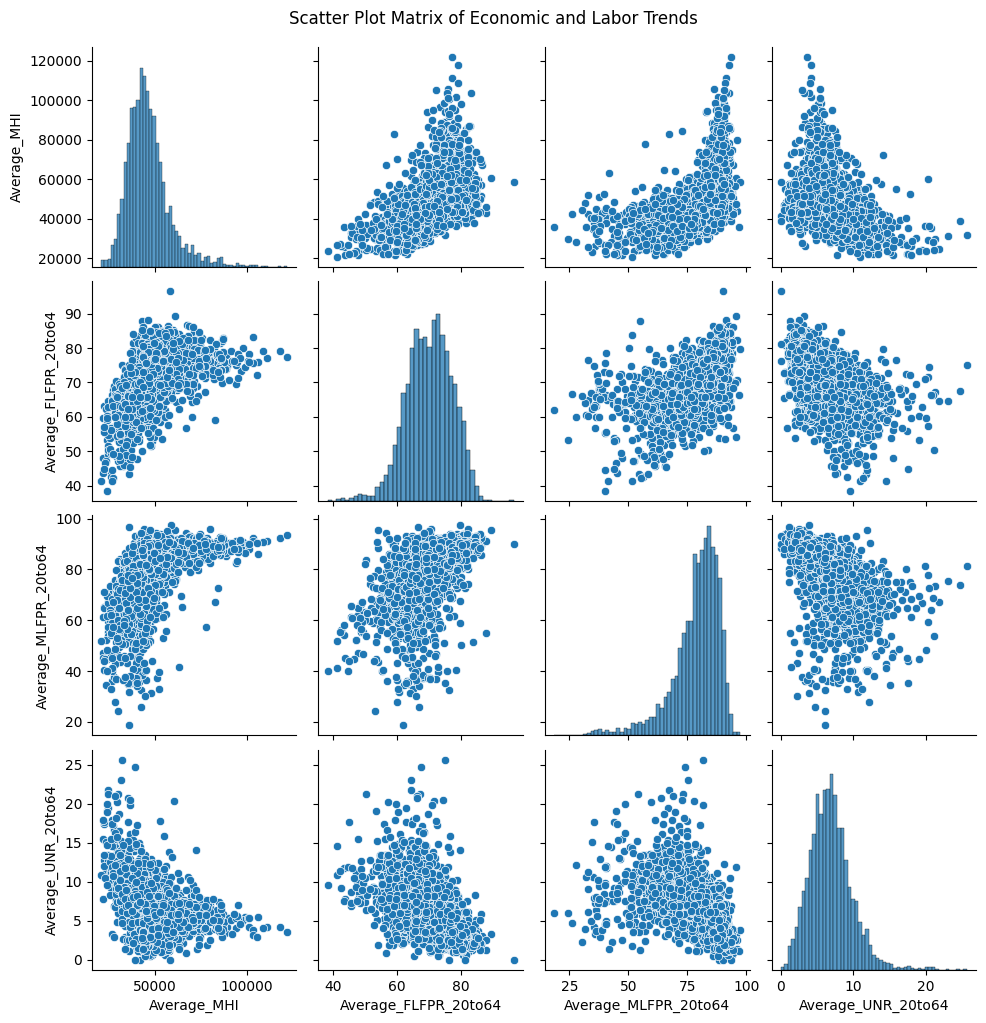

In [7]:
df_trends = df.group_by(['State_Name', 'County_Name']).agg([
    pl.col('MHI').mean().alias('Average_MHI'),
    pl.col('FLFPR_20to64').mean().alias('Average_FLFPR_20to64'),
    pl.col('MLFPR_20to64').mean().alias('Average_MLFPR_20to64'),
    pl.col('UNR_20to64').mean().alias('Average_UNR_20to64')
])

df_trends_pandas = df_trends.to_pandas() # Not all plots like Polars

# Create a scatter plot matrix
sns.pairplot(df_trends_pandas[['Average_MHI', 'Average_FLFPR_20to64', 'Average_MLFPR_20to64', 'Average_UNR_20to64']])
plt.suptitle('Scatter Plot Matrix of Economic and Labor Trends', y=1.02)
plt.show()

## 3. Impact of High Childcare Costs (Infant) on Demographics

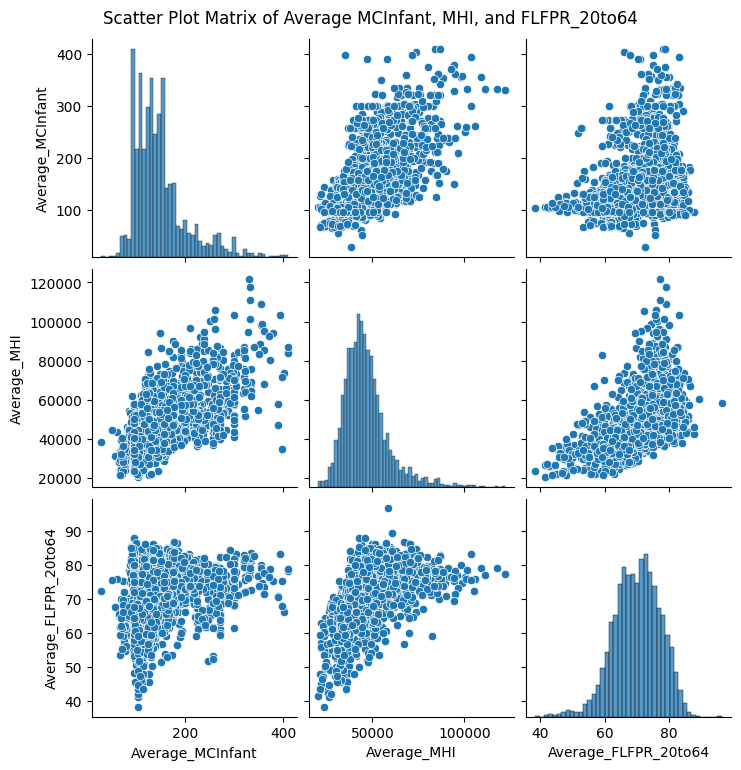

In [8]:
df_impact = df.select([
    'State_Name', 'County_Name', 'MCInfant', 'MHI', 'FLFPR_20to64'
]).group_by(['State_Name', 'County_Name']).agg([
    pl.col('MCInfant').mean().alias('Average_MCInfant'),
    pl.col('MHI').mean().alias('Average_MHI'),
    pl.col('FLFPR_20to64').mean().alias('Average_FLFPR_20to64')
])

df_impact_pandas = df_impact.to_pandas() # Not all plots integrate with Polars super well

# Create a scatter plot matrix
sns.pairplot(df_impact_pandas[['Average_MCInfant', 'Average_MHI', 'Average_FLFPR_20to64']])
plt.suptitle('Scatter Plot Matrix of Average MCInfant, MHI, and FLFPR_20to64', y=1.02)
plt.show()

## 4. Relationships with Race

/var/folders/x7/qrnrw4rd6jlbxb3n07zps4vh0000gn/T/ipykernel_16372/173326655.py:10: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  race_counts_df = pl.DataFrame(list(race_counts.items()), ['Racial Group', 'Count'])


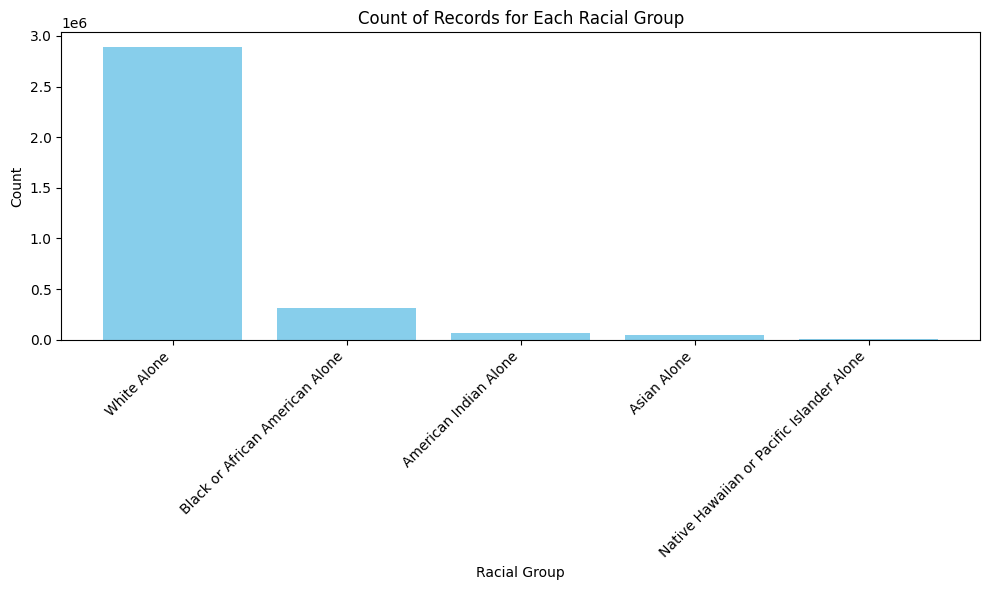

In [9]:
# Sum of Race Counts.
race_counts = {
    'White Alone': df['OneRace_W'].sum(),
    'Black or African American Alone': df['OneRace_B'].sum(),
    'American Indian Alone': df['OneRace_I'].sum(),
    'Asian Alone': df['OneRace_A'].sum(),
    'Native Hawaiian or Pacific Islander Alone': df['OneRace_H'].sum()
}

race_counts_df = pl.DataFrame(list(race_counts.items()), ['Racial Group', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(race_counts_df['Racial Group'], race_counts_df['Count'], color='skyblue')
plt.xlabel('Racial Group')
plt.ylabel('Count')
plt.title('Count of Records for Each Racial Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

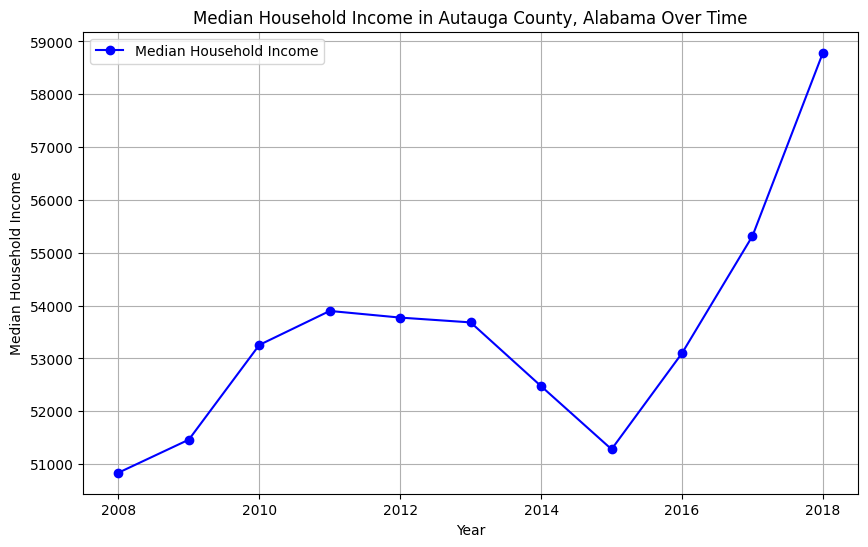

In [3]:
# Filter relevant columns
df_filtered = df.select([
    'State_Name', 'County_Name', 'StudyYear', 'MHI'
])

# Plotting Median Household Income (MHI) over the years
state = "Alabama"
county = "Autauga County"

df_plot = df_filtered.filter(
    (pl.col('State_Name') == state) & 
    (pl.col('County_Name') == county)
)

plt.figure(figsize=(10, 6))
plt.plot(df_plot['StudyYear'], df_plot['MHI'], marker='o', color='b', label='Median Household Income')
plt.title(f'Median Household Income in {county}, {state} Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/x7/qrnrw4rd6jlbxb3n07zps4vh0000gn/T/ipykernel_73314/3963818076.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State_Name', y='Avg_MHI', data=mhi_by_state.to_pandas(), palette="Blues_d")


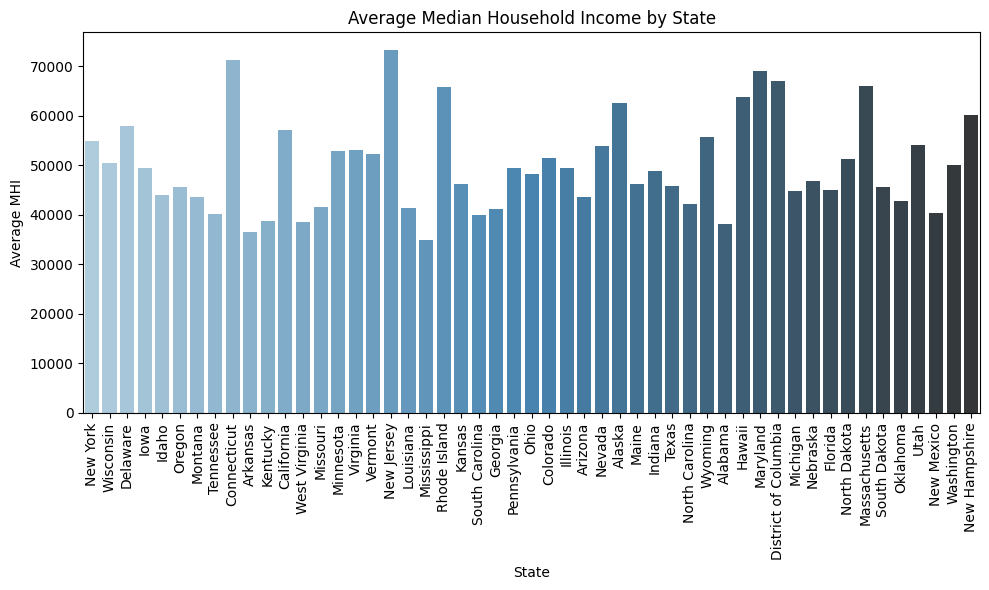

In [5]:
# Selecting a subset of the data to use for the visualizations
df_filtered = df.select([
    "State_Name", "County_Name", "StudyYear", 
    "MHI", "TotalPop", "OneRace_W", "OneRace_B", 
    "FLFPR_20to64", "MLFPR_20to64"
])

# Bar Plot: Median Household Income (MHI) by State
mhi_by_state = df_filtered.group_by("State_Name").agg([
    pl.col("MHI").mean().alias("Avg_MHI")
])

plt.figure(figsize=(10, 6))
sns.barplot(x='State_Name', y='Avg_MHI', data=mhi_by_state.to_pandas(), palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Average Median Household Income by State')
plt.xlabel('State')
plt.ylabel('Average MHI')
plt.tight_layout()
plt.show()

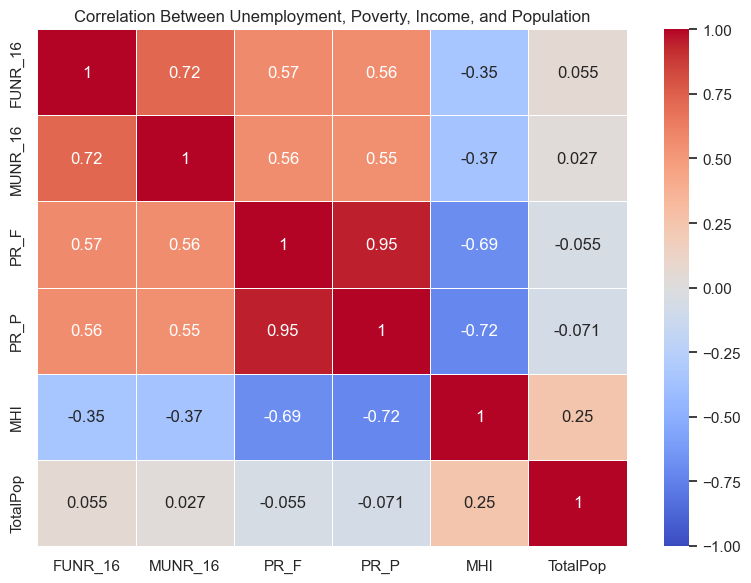

In [10]:
# Clean and prepare the data for visualization
# Selecting different columns for the heatmap
df_filtered = df.select([
    "State_Name", "County_Name", "StudyYear", 
    "FUNR_16", "MUNR_16", "PR_F", "PR_P", 
    "MHI", "TotalPop"
])

# Heatmap: Correlation between Unemployment, Poverty Rates, Income, and Population
df_corr = df_filtered.select([
    "FUNR_16", "MUNR_16", "PR_F", "PR_P", 
    "MHI", "TotalPop"
]).to_pandas().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Between Unemployment, Poverty, Income, and Population')
plt.tight_layout()
plt.show()